In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

In [2]:
df = pd.read_table('C:/AI/seeds_dataset.txt', header=1, sep='\s+')
df.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length pf kernel groove', 'class']
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length pf kernel groove,class
0,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
1,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
2,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
3,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
4,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
...,...,...,...,...,...,...,...,...
203,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
204,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
205,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
206,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length pf kernel groove    0
class                      0
dtype: int64

Text(0.5, 1.0, 'class of seeds')

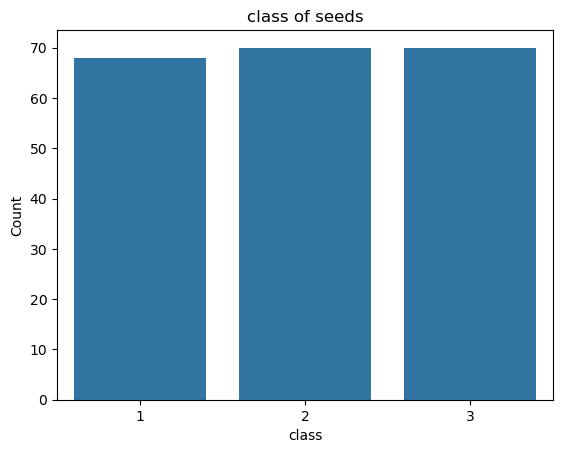

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("class of seeds")

In [5]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
2    70
3    70
1    68
Name: count, dtype: int64

In [6]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length pf kernel groove',
       'class'],
      dtype='object')

In [7]:
X=df.drop('class', axis=1)

X.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length pf kernel groove
0,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
1,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
2,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
3,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
4,14.69,14.49,0.8799,5.563,3.259,3.586,5.219


In [8]:
y=df['class']
y.value_counts()

class
2    70
3    70
1    68
Name: count, dtype: int64

In [9]:
y = pd.get_dummies(y).values

In [10]:
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#모델 학습 효율 높이기 위한 StandardScaler
ss =StandardScaler()
ss.fit(X_train)
ss_train = ss.transform(X_train)
ss_test = ss.transform(X_test)
print(ss_train)

[[-1.15995442e+00 -1.06145134e+00 -1.73659834e+00 ... -1.51588004e+00
   3.86898896e-01 -5.37611584e-01]
 [-7.19780943e-01 -6.36057695e-01 -9.31556350e-01 ... -8.73939153e-01
  -3.07448456e-01 -3.31528701e-01]
 [ 1.95225334e-01  2.76605026e-01 -2.05877810e-02 ...  4.74157035e-04
   5.25633672e-01 -1.58752141e-01]
 ...
 [ 1.84847531e+00  1.86216314e+00  4.66674477e-01 ...  1.62513937e+00
  -4.71101615e-01  1.93538302e+00]
 [ 5.65880193e-02  1.37385289e-01 -1.05329043e-01 ...  4.27418699e-02
  -1.10012240e+00 -8.17312655e-02]
 [-1.34018293e+00 -1.18520221e+00 -2.55011446e+00 ... -1.58720681e+00
   9.55980867e-01 -4.27284384e-01]]


In [13]:
ss_train.shape, y_train.shape, ss_test.shape, y_test.shape

((156, 7), (156, 3), (52, 7), (52, 3))

In [35]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

inputs = Input(shape=(ss_train.shape[1],))

x = Dense(32, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)
#x = Dense(6, activation='relu')(x)
#x = layers.Dropout(0.3)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 835 (3.26 KB)

 Trainable params: 835 (3.26 KB)

 Non-trainable params: 0 (0.00 B)

monitor: 모니터링할 성능 지표를 지정합니다. 일반적으로 검증 데이터셋의 손실(val_loss) 또는 정확도(val_accuracy)가 사용됩니다.
patience: 지정된 에포크 수 동안 성능 향상이 없을 경우 학습을 중단합니다. 예를 들어, patience=10은 지정된 성능 지표가 10회의 에포크 동안 개선되지 않으면 학습을 중단하라는 의미입니다.
verbose: 조기 종료 시 로그를 출력합니다. 1로 설정하면 메시지가 출력됩니다.
mode: 모니터링하는 지표가 최소값을 가져야 하는지(min), 최대값을 가져야 하는지(max) 혹은 변화가 없어야 하는지(auto)를 지정합니다. 손실을 모니터링할 때는 min, 정확도를 모니터링할 때는 max를 사용합니다.
restore_best_weights: True로 설정하면, 학습이 끝난 후 모델의 가중치를 모니터링 지표에 대해 가장 좋은 상태로 복원합니다.

In [36]:
#조기 종료
from keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', # 모니터링 대상 성능 지표
#                               patience=10, # 성능 향상이 없는 에포크를 몇 번이나 허용할 것인지
#                               verbose=1, # 조기 종료 시 로그를 출력
#                               mode='min', # 모니터링 지표가 최소화되어야 할 때
#                               restore_best_weights=True) # 가장 좋은 모델의 가중치를 복원할지 여부
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 1,mode = 'auto')

history = model.fit(ss_train,
                    y_train,
                    epochs = 1000, 
                    batch_size = 10, 
                    validation_data = (ss_test, y_test),
                    callbacks = [early_stopping])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5964 - loss: 0.7745 - val_accuracy: 0.9423 - val_loss: 0.1596
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8781 - loss: 0.3726 - val_accuracy: 0.9423 - val_loss: 0.1869
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9528 - loss: 0.2138 - val_accuracy: 0.9423 - val_loss: 0.1805
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8794 - loss: 0.4622 - val_accuracy: 0.9615 - val_loss: 0.1242
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.2009 - val_accuracy: 0.9231 - val_loss: 0.2078
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8899 - loss: 0.3657 - val_accuracy: 0.9423 - val_loss: 0.1193
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9131 - loss: 0.1994 - val_accuracy: 0.9615 - val_loss: 0.1123
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9246 - loss: 0.1948 - val_accuracy: 0

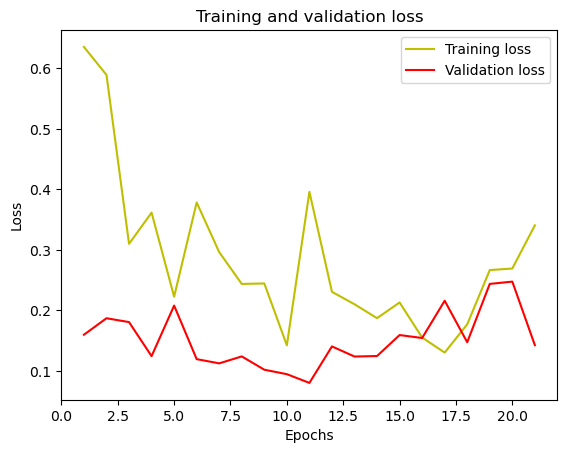

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

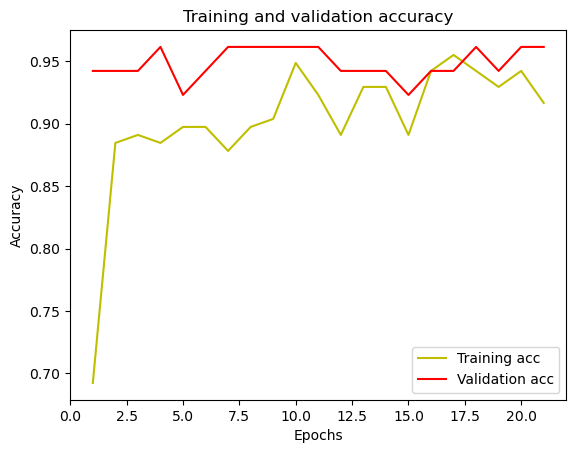

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()